# Очистка данных. Практическая работа

## Цель практической работы

- Научиться выполнять очистку и подготовку данных для их дальнейшего использования в задаче машинного обучения.

## Что нужно сделать

- Загрузить данные в ноутбук.
- Провести разведочный анализ данных.
- Разделить данные на обучающую и тестовую выборки.
- Выполнить очистку и подготовку данных.

## Что оценивается 

1. Выполнены все этапы задания.
1. Не допущены утечки данных.

## Формат сдачи

Выполните предложенные задания: впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [1]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
### YOUR CODE HERE ###
import pandas as pd

In [3]:
df = pd.read_csv('12.5 Mall_Customers.csv')

In [4]:
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

In [5]:
### YOUR CODE HERE ###
df.isna().sum()


CustomerID                 0
Genre                     19
Age                       20
Annual Income (k$)        20
Spending Score (1-100)     0
dtype: int64

In [6]:
df.isna().sum() / df.shape[0]

CustomerID                0.000
Genre                     0.095
Age                       0.100
Annual Income (k$)        0.100
Spending Score (1-100)    0.000
dtype: float64

In [7]:
df.CustomerID.info()

<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: CustomerID
Non-Null Count  Dtype
--------------  -----
200 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


In [8]:
# Лишняя колонка
df = df.drop('CustomerID', axis=1)

In [9]:
for col in df.columns:
    if col == 'CustomerID':
        continue
#     print(col)    
    print(df[col].value_counts()    )
    
    print('  ')    

Genre
Female     102
Male        77
Feemale      2
Name: count, dtype: int64
  
Age
32.0     10
35.0      8
31.0      7
30.0      7
49.0      7
19.0      6
40.0      6
47.0      6
23.0      6
27.0      6
36.0      5
38.0      5
48.0      5
20.0      4
59.0      4
18.0      4
34.0      4
29.0      4
54.0      4
37.0      3
60.0      3
43.0      3
67.0      3
25.0      3
39.0      3
50.0      3
46.0      3
33.0      3
28.0      3
22.0      3
24.0      3
45.0      3
21.0      3
68.0      3
44.0      2
57.0      2
26.0      2
51.0      2
52.0      2
135.0     2
58.0      2
65.0      2
53.0      2
41.0      2
63.0      1
70.0      1
69.0      1
55.0      1
66.0      1
56.0      1
42.0      1
Name: count, dtype: int64
  
Annual Income (k$)
54.0     11
78.0     11
63.0      6
60.0      6
87.0      6
         ..
37.0      1
113.0     1
69.0      1
76.0      1
15.0      1
Name: count, Length: 64, dtype: int64
  
Spending Score (1-100)
42    8
55    7
46    6
73    6
35    5
     ..
31    1
44  

In [10]:
# совершенно неудобно с такими названиями
df = df.rename(columns={'Age': 'age', 
                        'Annual Income (k$)':'annual_income', 
                        'Spending Score (1-100)': 'spending_score',
                       'Genre': 'gender'
                       })

In [11]:
# lol fee-male:))
def feemale(df):
    df.loc[df.gender == 'Feemale', 'gender'] = 'Female'
    return df

In [12]:
# -27% of DF - i'd say too much to just get rid of 'em
df[(df.age.isna() == False) & (df.gender.isna() == False) & (df['annual_income'].isna() == False)].shape[0]/ df.shape[0]

0.73

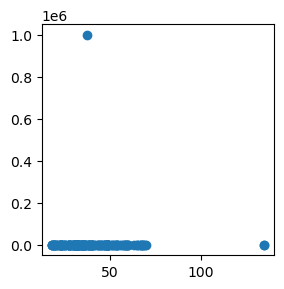

In [13]:
# так себе график:(
plt.figure(figsize=(3,3))
plt.scatter(df.age, df.annual_income )
plt.show()

In [14]:
def calculate_iqr_boundaries(series):
    q25 = series.quantile(0.25)
    q75 = series.quantile(0.75)
    iqr = q75 - q25

    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    return boundaries

### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [15]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(df, test_size=0.2, random_state=1)

### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

In [16]:
x_train = feemale(x_train)

In [17]:
# для чистоты эксперимента проверим выбросы

Histogram for age


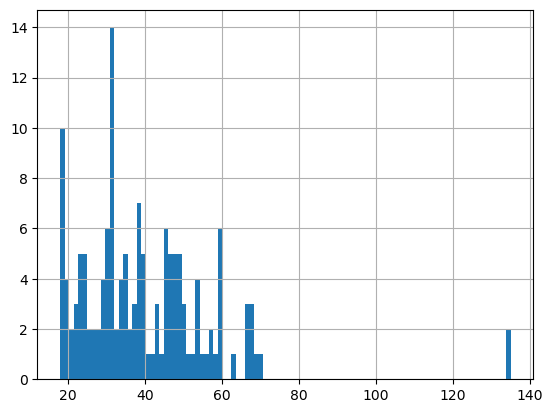

Histogram for annual_income


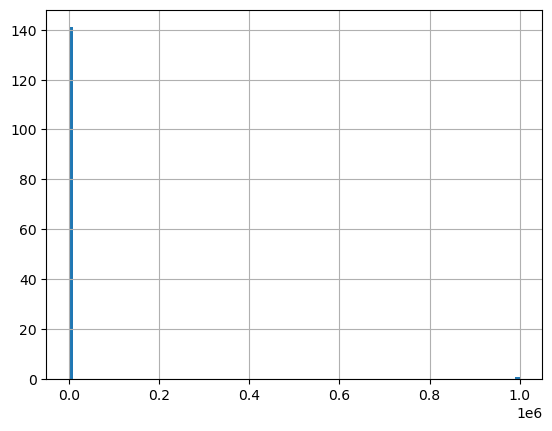

Histogram for spending_score


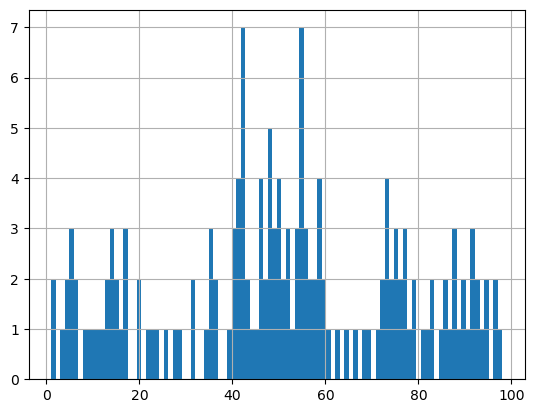

In [18]:
### YOUR CODE HERE ###
num_cols = []

for col in x_train.columns:
    if x_train[col].dtype == 'O':
        continue
    else:
        num_cols.append(col)

for col in num_cols:
    print(f'Histogram for {col}')
    x_train[col].hist(bins=100)
    plt.show()


In [19]:
# well, thats obviously BS:)
x_train.age.max()

135.0

In [20]:
# good for you! but i dont think so tho:)
x_train.annual_income.max()

1000000.0

In [21]:
# кажется, придется сначала разобраться с выбросами 
# по этому для начала целесообразнее считаю разобраться с выбросами
# сразу и в возрасте и в доходе

for col in x_train.columns:
    if col == 'gender':
        continue
#     iter_name = f'{col}'
    exec(f'{col}_boundaries = calculate_iqr_boundaries(x_train.{col})')
    print(col,' ', end='')
    exec(f'print({col}_boundaries)')



In [22]:
def bounds_f(x_train):
    bounds = []
    bounds_d = dict()
    for col in x_train.columns:
        if col == 'gender':
            continue
    #     iter_name = f'{col}'
        exec(f'{col}_boundaries = calculate_iqr_boundaries(x_train.{col})')
        exec(f'bounds.append(({col}_boundaries))')
    for i in range(len(x_train.columns)):
        if x_train.columns[i] == 'gender':
            continue
        bounds_d[x_train.columns[i]] = bounds[i-1]
    return bounds_d

In [23]:
bounds = bounds_f(x_train)
bounds

{'age': (0.5, 76.5),
 'annual_income': (-7.375, 127.625),
 'spending_score': (-20.125, 128.875)}

In [24]:
def age_f(x_train):
    x_train.loc[x_train['age'] >= bounds['age'][1], 'age'] = bounds['age'][1]
    return x_train

In [25]:
x_train = age_f(x_train)

In [26]:
x_train.loc[x_train['annual_income'] >= bounds['annual_income'][1], 'annual_income']

199        137.0
156    1000000.0
Name: annual_income, dtype: float64

In [27]:
# думаю, 137 можно и оставить, даже если оно вылезает за границу чуть-чуть
def ann_f(x_train):
    x_train.loc[x_train['annual_income'] >= 138, 'annual_income'] = bounds['annual_income'][1]
    return x_train

In [28]:
x_train = ann_f(x_train)

In [29]:
# колонок не много, начнем с пола - проверим есть ли существенная разница по доходу - может мы могли бы предположить на 
# основании этих данных что нибудь
abs(round ((x_train[x_train.gender == 'Male'].annual_income.mean() - x_train[x_train.gender == 'Female'].annual_income.mean()), 2))
# нет, кажется разница не настолько существенна, чтобы делать какие то выводы. посмотрим на рейтинг покупателя

3.6

In [30]:
abs(round ((x_train[x_train.gender == 'Male'].spending_score.mean()-x_train[x_train.gender == 'Female'].spending_score.mean())/100, 2))

0.05

In [31]:
def gender_coding(x_train):
    encoder = LabelEncoder()
    x_train['gender_le'] = encoder.fit_transform(x_train['gender'])
    return x_train

In [32]:
x_train = gender_coding(x_train)

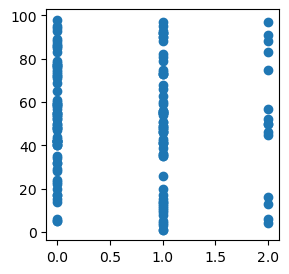

In [33]:
plt.figure(figsize=(3,3))
plt.scatter(x_train.gender_le, x_train.spending_score )
plt.show()

In [34]:
# Тоже не однозначно
def gender_fill(x_train):
    x_train.loc[(x_train.gender != 'Male') & (x_train.gender != 'Female') , 'gender'] = 'not_set'
    return x_train
# оставим незаполненным, заполним 'локом' вместо импьютера - тут простое условие и небольшой сет

In [35]:
x_train.isna().sum()

gender            15
age               15
annual_income     18
spending_score     0
gender_le          0
dtype: int64

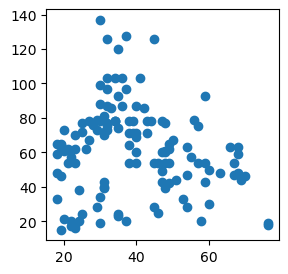

In [36]:

# попытка № 2
# зависимости, правда,  не видно

plt.figure(figsize=(3,3))
plt.scatter(x_train.age, x_train.annual_income )
plt.show()

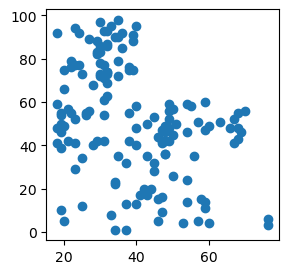

In [37]:
plt.figure(figsize=(3,3))
plt.scatter(x_train.age, x_train.spending_score )
plt.show()

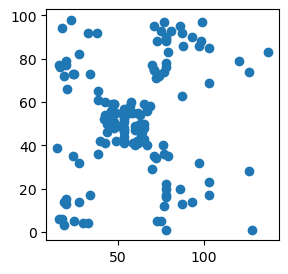

In [38]:
plt.figure(figsize=(3,3))
plt.scatter(x_train.annual_income, x_train.spending_score )
plt.show()

In [39]:
from sklearn.impute import SimpleImputer

In [40]:
# теперь, наконец можно заполнить доход медианой, а возраст средним

In [41]:
def ann_imp_f(x_train):
    imp_median = SimpleImputer(strategy='median')
    med_cols = ['annual_income']
    x_train[med_cols] = imp_median.fit_transform(x_train[med_cols])
    return x_train

In [42]:
def age_imp_f(x_train):
    imp_mean = SimpleImputer(strategy='mean')
    mean_cols = ['age']
    x_train[mean_cols] = imp_mean.fit_transform(x_train[mean_cols])
    return x_train

In [43]:
x_train = ann_imp_f(x_train)

In [44]:
x_train = age_imp_f(x_train)

### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


In [45]:
# мне показалось заполнять пропуски средним-медианой при наличии выбросов/ошибок неправильным - в частности оооочень 
# страдала колонка дохода при попытке проследить зависимость доход<->пол
# по этому выбросы обработались ДО пропусков
# что касается аргументации - медиана для дохода и среднее для возраста - не нолики, т.к. это было бы странно - 
# удалять строки с пропусками так же показалось расточительным, т.к. весь 
# сет 200 объектов, 160 на обучение - тут нужно спасать все, что имеет хотя бы толику реальных данных 
# - если что потом можно будет попробовать заполнить по другому, если метрика будет неудовлетворительна же

### Задание 6

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.


In [46]:
# на "стаке" рекомендуют минмакс при ненормальном распределении и стандарт при нормальном

In [47]:
from scipy import stats

In [48]:
for col in x_train.columns:

    if col == 'gender':
        continue
    res = stats.shapiro(x_train[col])
    
    print(col,' - not normal dist' if res.pvalue <= 0.05  else '- normal dist')
#     res.pvalue > 0.05
    

age  - not normal dist
annual_income  - not normal dist
spending_score  - not normal dist
gender_le  - not normal dist


In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


In [50]:
def scaler_f(x_train, scaler):
    num_cols = []
    for col in x_train.columns:
        if x_train.dtypes[col] == 'O':
            continue
        if 'le' in col:
            continue
        num_cols.append(col)
    x_train_nums = x_train[num_cols]
    x_train_s = scaler.transform(x_train_nums)
    x_train[num_cols] = x_train_s
    return x_train

In [51]:
# а есть ли смысл кодировать кодированные колонки? я так понял это один из "открытых" вопросов..
# я где то вычитал, что с точки зрения качества предсказаний линейным моделям без регуляризации в общем все равно, 
# а вот лассо и другие могут подстраивать штрафы под эти значения, что, кажется, в корне некорректным, т.к. 
# по сути это же не число, а все же "да/нет" 
# но насколько это вопрос интерпретации с моей стороны - т.е. "не особо важно", 
# что я думаю на эту тему, и насколько это вопрос качества предсказания?

In [52]:
num_cols = []
for col in x_train.columns:
    if x_train.dtypes[col] == 'O':
        continue
    if 'le' in col:
        continue
    num_cols.append(col)
x_train_nums = x_train[num_cols]
scaler.fit(x_train_nums)

MinMaxScaler()

In [53]:
x_train = scaler_f(x_train, scaler)

In [54]:
x_train

,gender,age,annual_income,spending_score,gender_le
108,Male,0.854701,0.393443,0.432990,1
107,Male,0.615385,0.393443,0.463918,1
189,Female,0.307692,0.721311,0.865979,0
14,Male,0.324786,0.040984,0.123711,1
56,NaN,0.564103,0.237705,0.505155,2
...,...,...,...,...,...
133,Female,0.222222,0.467213,0.721649,0
137,Male,0.239316,0.475410,0.742268,1
72,Female,0.717949,0.286885,0.494845,0
140,Female,0.666667,0.491803,0.041237,0


### Задание 7

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

In [55]:
### YOUR CODE HERE ###
# закодировали лэйбл-кодером - значений не много. думаю, на больших сетах LE будет экономичнее

### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

In [56]:
### YOUR CODE HERE ###
x_test = feemale(x_test)
bounds = bounds_f(x_test)
x_test = age_f(x_test)
x_test = ann_f(x_test)
x_test = gender_coding(x_test)
x_test = gender_fill(x_test)
x_test = ann_imp_f(x_test)
x_test = age_imp_f(x_test)
x_test = scaler_f(x_test, scaler)

In [57]:
x_test.isna().sum()

gender            0
age               0
annual_income     0
spending_score    0
gender_le         0
dtype: int64